In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
median_income_forecast = pd.read_csv("median_income_estimate_by_zip.csv")
median_income_df = pd.DataFrame(median_income_forecast)

In [3]:
median_income_df.head()

,Unnamed: 0,median_inc,year,zip
0,0,80290,2016,91901
1,1,87540,2016,91902
2,2,35859,2016,91905
3,3,38053,2016,91906
4,4,50274,2016,91910


In [4]:
median_home_price = pd.read_csv("../ZipCode_File/Zip_Zhvi_AllHomes.csv")

In [5]:
median_home_price_df = pd.DataFrame(median_home_price)

median_home_price_df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09
0,61639,10025,New York,NY,New York-Newark-Jersey City,New York,1,171600.0,171600.0,171400.0,...,1138100,1136400,1133500,1127600,1122800,1120600,1114600,1102700,1091700,1086800
1,84654,60657,Chicago,IL,Chicago-Naperville-Elgin,Cook,2,158400.0,159700.0,160700.0,...,347500,349200,352000,353400,352100,350500,348800,347800,348200,349800
2,61637,10023,New York,NY,New York-Newark-Jersey City,New York,3,347900.0,349600.0,351100.0,...,1565000,1540200,1520200,1504000,1503000,1510200,1496700,1469800,1444700,1423500
3,91982,77494,Katy,TX,Houston-The Woodlands-Sugar Land,Harris,4,210400.0,212200.0,212200.0,...,321100,322900,326600,330400,332500,334400,335800,337000,338200,338900
4,84616,60614,Chicago,IL,Chicago-Naperville-Elgin,Cook,5,192500.0,194500.0,196100.0,...,425600,426600,429500,431000,429800,428800,428900,430800,431800,432100


In [11]:
med_home_price_df = median_home_price_df.rename(columns={'RegionName':'zip'})

med_home_price_df

,RegionID,zip,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09
0,61639,10025,New York,NY,New York-Newark-Jersey City,New York,1,171600.0,171600.0,171400.0,...,1138100,1136400,1133500,1127600,1122800,1120600,1114600,1102700,1091700,1086800
1,84654,60657,Chicago,IL,Chicago-Naperville-Elgin,Cook,2,158400.0,159700.0,160700.0,...,347500,349200,352000,353400,352100,350500,348800,347800,348200,349800
2,61637,10023,New York,NY,New York-Newark-Jersey City,New York,3,347900.0,349600.0,351100.0,...,1565000,1540200,1520200,1504000,1503000,1510200,1496700,1469800,1444700,1423500
3,91982,77494,Katy,TX,Houston-The Woodlands-Sugar Land,Harris,4,210400.0,212200.0,212200.0,...,321100,322900,326600,330400,332500,334400,335800,337000,338200,338900
4,84616,60614,Chicago,IL,Chicago-Naperville-Elgin,Cook,5,192500.0,194500.0,196100.0,...,425600,426600,429500,431000,429800,428800,428900,430800,431800,432100
5,93144,79936,El Paso,TX,El Paso,El Paso,6,77200.0,77200.0,77300.0,...,120700,120500,120700,121000,121400,122100,122900,123500,124500,125500
6,91940,77449,Katy,TX,Houston-The Woodlands-Sugar Land,Harris,7,95400.0,95600.0,95800.0,...,172200,173600,174700,175600,176500,176800,176800,177200,177900,178200
7,91733,77084,Houston,TX,Houston-The Woodlands-Sugar Land,Harris,8,94700.0,95000.0,95200.0,...,162500,162500,162600,163200,164400,165400,166000,166800,167900,168700
8,61616,10002,New York,NY,New York-Newark-Jersey City,New York,9,NaN,NaN,NaN,...,989800,981900,982700,985200,991300,1001800,1006500,1007200,1005500,1001200
9,61807,10467,New York,NY,New York-Newark-Jersey City,Bronx,10,141800.0,141700.0,141600.0,...,384800,390900,397700,401600,401800,403800,409300,414200,418800,422800


In [14]:
median_price_income = pd.merge(median_income_df, med_home_price_df, how='inner', on='zip')

In [15]:
median_price_income

,Unnamed: 0,median_inc,year,zip,RegionID,City,State,Metro,CountyName,SizeRank,...,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09
0,0,80290,2016,91901,96538,Alpine,CA,San Diego-Carlsbad,San Diego,6961,...,615300,622100,628600,632500,633600,633000,631400,631700,632900,633800
1,69,80290,2016,91901,96538,Alpine,CA,San Diego-Carlsbad,San Diego,6961,...,615300,622100,628600,632500,633600,633000,631400,631700,632900,633800
2,138,80290,2016,91901,96538,Alpine,CA,San Diego-Carlsbad,San Diego,6961,...,615300,622100,628600,632500,633600,633000,631400,631700,632900,633800
3,1,87540,2016,91902,96539,Bonita,CA,San Diego-Carlsbad,San Diego,7074,...,653700,659600,668800,676000,677900,676200,673600,673800,676300,678500
4,70,87540,2016,91902,96539,Bonita,CA,San Diego-Carlsbad,San Diego,7074,...,653700,659600,668800,676000,677900,676200,673600,673800,676300,678500
5,139,87540,2016,91902,96539,Bonita,CA,San Diego-Carlsbad,San Diego,7074,...,653700,659600,668800,676000,677900,676200,673600,673800,676300,678500
6,3,38053,2016,91906,96542,Campo,CA,San Diego-Carlsbad,San Diego,12480,...,285000,289600,294800,297400,296400,295100,295400,296700,298400,300200
7,72,38053,2016,91906,96542,Campo,CA,San Diego-Carlsbad,San Diego,12480,...,285000,289600,294800,297400,296400,295100,295400,296700,298400,300200
8,141,38053,2016,91906,96542,Campo,CA,San Diego-Carlsbad,San Diego,12480,...,285000,289600,294800,297400,296400,295100,295400,296700,298400,300200
9,4,50274,2016,91910,96545,Chula Vista,CA,San Diego-Carlsbad,San Diego,118,...,505600,511500,518800,523600,525200,525400,525000,525900,529400,533000


[]

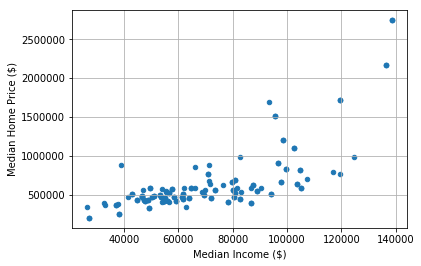

In [25]:
median_price_income.plot(kind='scatter', x='median_inc', y="2016-12", grid=True)
plt.ylabel('Median Home Price ($)')
plt.xlabel('Median Income ($)')
plt.plot()

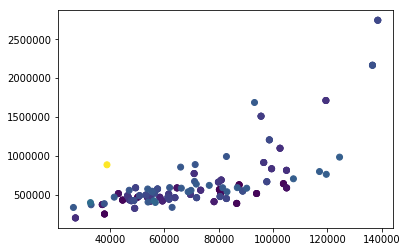

In [32]:
plt.scatter(x=median_price_income['median_inc'], y=median_price_income['2016-12'], c=median_price_income['zip'])
